In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv(r'C:\pyml_scripts\train.csv')
pred_data = pd.read_csv(r'C:\pyml_scripts\test.csv')
all_data = pd.concat([train_data,pred_data],axis=0) 

In [3]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
pred_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
train_data_Sex_ohe = pd.get_dummies(train_data['Sex'],prefix='Sex')
train_data = pd.concat([train_data,train_data_Sex_ohe],axis=1)
pred_data_Sex_ohe = pd.get_dummies(pred_data['Sex'],prefix='Sex')
pred_data = pd.concat([pred_data,pred_data_Sex_ohe],axis=1)
all_data_Sex_ohe = pd.get_dummies(all_data['Sex'],prefix='Sex')
all_data = pd.concat([all_data,all_data_Sex_ohe],axis=1)

In [6]:
all_data['Cabin'] = all_data['Cabin'].fillna('Unknown')
train_data['Cabin'] = train_data['Cabin'].fillna('Unknown')
pred_data['Cabin'] = pred_data['Cabin'].fillna('Unknown')
all_data['Deck'] = all_data['Cabin'].str.get(0)
train_data['Deck'] = train_data['Cabin'].str.get(0)
pred_data['Deck'] = pred_data['Cabin'].str.get(0)

def hascabin(cb):
    if (cb == 'Unknown'):
        return 'No'
    else:
        return 'Yes'
    
train_data['HasCabin'] = train_data['Cabin'].apply(hascabin)
pred_data['HasCabin'] = pred_data['Cabin'].apply(hascabin)
all_data['HasCabin'] = all_data['Cabin'].apply(hascabin)

train_data_HasCabin_ohe = pd.get_dummies(train_data['HasCabin'],prefix='HasCabin')
train_data = pd.concat([train_data,train_data_HasCabin_ohe],axis=1)
pred_data_HasCabin_ohe = pd.get_dummies(pred_data['HasCabin'],prefix='HasCabin')
pred_data = pd.concat([pred_data,pred_data_HasCabin_ohe],axis=1)
all_data_HasCabin_ohe = pd.get_dummies(all_data['HasCabin'],prefix='HasCabin')
all_data = pd.concat([all_data,all_data_HasCabin_ohe],axis=1)

In [7]:
all_data['Title'] = all_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0].strip())
train_data['Title'] = train_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0].strip())
pred_data['Title'] = pred_data['Name'].apply(lambda x: x.split(',')[1]).apply(lambda x: x.split('.')[0].strip())

Title_Dict = {}
Title_Dict.update(dict.fromkeys(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer'))
Title_Dict.update(dict.fromkeys(['Don', 'Sir', 'the Countess', 'Dona', 'Lady'], 'Royalty'))
Title_Dict.update(dict.fromkeys(['Mme', 'Ms', 'Mrs'], 'Mrs'))
Title_Dict.update(dict.fromkeys(['Mlle', 'Miss'], 'Miss'))
Title_Dict.update(dict.fromkeys(['Mr'], 'Mr'))
Title_Dict.update(dict.fromkeys(['Master','Jonkheer'], 'Master'))
all_data['Title'] = all_data['Title'].map(Title_Dict)
train_data['Title'] = train_data['Title'].map(Title_Dict)
pred_data['Title'] = pred_data['Title'].map(Title_Dict)

In [8]:
train_data_Title_ohe = pd.get_dummies(train_data['Title'],prefix='Title')
train_data = pd.concat([train_data,train_data_Title_ohe],axis=1)
pred_data_Title_ohe = pd.get_dummies(pred_data['Title'],prefix='Title')
pred_data = pd.concat([pred_data,pred_data_Title_ohe],axis=1)
all_data_Title_ohe = pd.get_dummies(all_data['Title'],prefix='Title')
all_data = pd.concat([all_data,all_data_Title_ohe],axis=1)

In [9]:
all_data['NameLen'] = all_data.Name.apply(lambda x: x.split('.')[1].strip()).apply(lambda x: len(x))
train_data['NameLen'] = train_data.Name.apply(lambda x: x.split('.')[1].strip()).apply(lambda x: len(x))
pred_data['NameLen'] = pred_data.Name.apply(lambda x: x.split('.')[1].strip()).apply(lambda x: len(x))

In [10]:
train_data.loc[train_data['Embarked'].isnull(),'Embarked'] = 'C'
all_data.loc[all_data['Embarked'].isnull(),'Embarked'] = 'C'

train_data_Embarked_ohe = pd.get_dummies(train_data['Embarked'],prefix='Embarked')
train_data = pd.concat([train_data,train_data_Embarked_ohe],axis=1)
pred_data_Embarked_ohe = pd.get_dummies(pred_data['Embarked'],prefix='Embarked')
pred_data = pd.concat([pred_data,pred_data_Embarked_ohe],axis=1)
all_data_Embarked_ohe = pd.get_dummies(all_data['Embarked'],prefix='Embarked')
all_data = pd.concat([all_data,all_data_Embarked_ohe],axis=1)

In [11]:
all_data['FamilySize'] = all_data['Parch'] + all_data['SibSp'] + 1
train_data['FamilySize'] = train_data['Parch'] + train_data['SibSp'] + 1
pred_data['FamilySize'] = pred_data['Parch'] + pred_data['SibSp'] + 1

In [12]:
def FamilyCat(fs):
    if (fs == 1):
        return 'Single'
    elif (fs >= 2) & (fs <= 4):
        return 'SmallFamily'
    elif (fs >= 5) & (fs <= 6):
        return 'MediumFamily'
    elif (fs >= 7):
        return 'LargeFamily'

all_data['FamilyClass'] = all_data['FamilySize'].apply(FamilyCat)
train_data['FamilyClass'] = train_data['FamilySize'].apply(FamilyCat)
pred_data['FamilyClass'] = pred_data['FamilySize'].apply(FamilyCat)

train_data_FamilyClass_ohe = pd.get_dummies(train_data['FamilyClass'],prefix='FamilyClass')
train_data = pd.concat([train_data,train_data_FamilyClass_ohe],axis=1)
pred_data_FamilyClass_ohe = pd.get_dummies(pred_data['FamilyClass'],prefix='FamilyClass')
pred_data = pd.concat([pred_data,pred_data_FamilyClass_ohe],axis=1)
all_data_FamilyClass_ohe = pd.get_dummies(all_data['FamilyClass'],prefix='FamilyClass')
all_data = pd.concat([all_data,all_data_FamilyClass_ohe],axis=1)

In [13]:
all_data.loc[all_data['Fare'].isnull(),'Fare'] = np.mean(all_data.loc[all_data['Pclass']==3,'Fare'])
pred_data.loc[pred_data['Fare'].isnull(),'Fare'] = np.mean(all_data.loc[all_data['Pclass']==3,'Fare'])

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

train_data_age = train_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass','NameLen','Survived']]
train_data_age_nn = train_data_age.loc[train_data_age['Age'].notnull()]
train_data_age_null = train_data_age.loc[train_data_age['Age'].isnull()]
X = train_data_age_nn.values[:,1:]
y = train_data_age_nn.values[:,0]
rfr = RandomForestRegressor(n_estimators=100)
gbr = GradientBoostingRegressor(n_estimators=100,learning_rate=1.0,subsample=0.8)

rfr.fit(X,y)
print(rfr.score(X,y))

train_data_age_pred = rfr.predict(train_data_age_null.values[:,1:].astype(float))
train_data.loc[train_data['Age'].isnull(),'Age'] = train_data_age_pred

0.836834126768


In [15]:
all_data_age = all_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass','NameLen']]
all_data_age_nn = all_data_age.loc[all_data_age['Age'].notnull()]
all_data_age_null = all_data_age.loc[all_data_age['Age'].isnull()]
X1 = all_data_age_nn.values[:,1:].astype(float)
y1 = all_data_age_nn.values[:,0].astype(float)
rfr1 = RandomForestRegressor(n_estimators=200)
rfr1.fit(X1,y1)
print(rfr1.score(X1,y1))

pred_data_age = pred_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass','NameLen']]
pred_data_age_nn = pred_data_age.loc[pred_data_age['Age'].notnull()]
pred_data_age_null = pred_data_age.loc[pred_data_age['Age'].isnull()]
pred_data_age_pred = rfr1.predict(pred_data_age_null.values[:,1:].astype(float))
pred_data.loc[pred_data['Age'].isnull(),'Age'] = pred_data_age_pred

0.81665120767


In [16]:
all_data_age = all_data[['Age','Fare', 'Parch', 'SibSp', 'Pclass','NameLen']]
all_data_age_nn = all_data_age.loc[all_data_age['Age'].notnull()]
all_data_age_null = all_data_age.loc[all_data_age['Age'].isnull()]
all_data_age_pred = rfr1.predict(all_data_age_null.values[:,1:].astype(float))
all_data.loc[all_data['Age'].isnull(),'Age'] = all_data_age_pred

In [17]:
def AgeLevelCat(age):
    if (age <= 15):
        return 'No'
    elif (age > 12):
        return 'Yes'

all_data['Adult'] = all_data['Age'].apply(AgeLevelCat)
train_data['Adult'] = train_data['Age'].apply(AgeLevelCat)
pred_data['Adult'] = pred_data['Age'].apply(AgeLevelCat)

train_data_Adult_ohe = pd.get_dummies(train_data['Adult'],prefix='Adult')
train_data = pd.concat([train_data,train_data_Adult_ohe],axis=1)
pred_data_Adult_ohe = pd.get_dummies(pred_data['Adult'],prefix='Adult')
pred_data = pd.concat([pred_data,pred_data_Adult_ohe],axis=1)
all_data_Adult_ohe = pd.get_dummies(all_data['Adult'],prefix='Adult')
all_data = pd.concat([all_data,all_data_Adult_ohe],axis=1)

In [18]:
train_data['Group_Ticket'] = train_data['Fare'].groupby(by=train_data['Ticket']).transform('count')
train_data['FareReal'] = train_data['Fare'] / train_data['Group_Ticket']
pred_data['Group_Ticket'] = pred_data['Fare'].groupby(by=pred_data['Ticket']).transform('count')
pred_data['FareReal'] = pred_data['Fare'] / pred_data['Group_Ticket']
all_data['Group_Ticket'] = all_data['Fare'].groupby(by=all_data['Ticket']).transform('count')
all_data['FareReal'] = all_data['Fare'] / all_data['Group_Ticket']

train_data['UseGT'] = np.where(train_data['Group_Ticket']==1,0 ,1)
pred_data['UseGT'] = np.where(pred_data['Group_Ticket']==1,0 ,1)
all_data['UseGT'] = np.where(all_data['Group_Ticket']==1,0 ,1)

In [19]:
train_data_UseGT_ohe = pd.get_dummies(train_data['UseGT'],prefix='UseGT')
train_data = pd.concat([train_data,train_data_UseGT_ohe],axis=1)
pred_data_UseGT_ohe = pd.get_dummies(pred_data['UseGT'],prefix='UseGT')
pred_data = pd.concat([pred_data,pred_data_UseGT_ohe],axis=1)
all_data_UseGT_ohe = pd.get_dummies(all_data['UseGT'],prefix='UseGT')
all_data = pd.concat([all_data,all_data_UseGT_ohe],axis=1)

In [20]:
train_data_sex_adult_ohe = pd.get_dummies(train_data,columns=['Sex','Adult'],prefix='SexAdult')
train_data = pd.concat([train_data,train_data_sex_adult_ohe[['SexAdult_female','SexAdult_male', 'SexAdult_No', 'SexAdult_Yes']]],axis=1)
pred_data_sex_adult_ohe = pd.get_dummies(pred_data,columns=['Sex','Adult'],prefix='SexAdult')
pred_data = pd.concat([pred_data,pred_data_sex_adult_ohe[['SexAdult_female','SexAdult_male', 'SexAdult_No', 'SexAdult_Yes']]],axis=1)
all_data_sex_adult_ohe = pd.get_dummies(all_data,columns=['Sex','Adult'],prefix='SexAdult')
all_data = pd.concat([all_data,all_data_sex_adult_ohe[['SexAdult_female','SexAdult_male', 'SexAdult_No', 'SexAdult_Yes']]],axis=1)

In [21]:
train_data_Pclass_ohe = pd.get_dummies(train_data['Pclass'],prefix='Pclass')
train_data = pd.concat([train_data,train_data_Pclass_ohe],axis=1)
pred_data_Pclass_ohe = pd.get_dummies(pred_data['Pclass'],prefix='Pclass')
pred_data = pd.concat([pred_data,pred_data_Pclass_ohe],axis=1)
all_data_Pclass_ohe = pd.get_dummies(all_data['Pclass'],prefix='Pclass')
all_data = pd.concat([all_data,all_data_Pclass_ohe],axis=1)

In [22]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,1,0,1,0,0,1


In [23]:
train_data2 = train_data.copy()
pred_data2 = pred_data.copy()

In [24]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,1,0,1,0,0,1


In [25]:
train_data2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,1,0,1,0,0,1


In [26]:
train_data2['Mother'] = np.where((train_data2['Age'] >= 18) & (train_data2['Parch'] >= 1) & (train_data2['Sex'] == 'female'),'Yes','No') 
pred_data2['Mother'] = np.where((pred_data2['Age'] >= 18) & (pred_data2['Parch'] >= 1) & (pred_data2['Sex'] == 'female'),'Yes','No') 

In [27]:
train_data2_Mother_ohe = pd.get_dummies(train_data2['Mother'],prefix='Mother')
train_data2 = pd.concat([train_data,train_data2_Mother_ohe],axis=1)
pred_data2_Mother_ohe = pd.get_dummies(pred_data2['Mother'],prefix='Mother')
pred_data2 = pd.concat([pred_data,pred_data2_Mother_ohe],axis=1)

In [28]:
train_data2.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3,Mother_No,Mother_Yes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,0,1,0,1,0,0,1,1,0


In [29]:
pred_data2.head(1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3,Mother_No,Mother_Yes
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Unknown,...,0,0,1,0,1,0,0,1,1,0


In [30]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,...,0,1,0,0,1,0,1,0,0,1


In [31]:
from sklearn.preprocessing import MinMaxScaler
AFN_scale = MinMaxScaler()
all_data[['Age','Fare','FareReal','NameLen','FamilySize']] = AFN_scale.fit_transform(all_data[['Age','Fare','FareReal', 'NameLen','FamilySize']])
train_data[['Age','Fare','FareReal','NameLen','FamilySize']] = AFN_scale.fit_transform(train_data[['Age','Fare','FareReal', 'NameLen','FamilySize']])
pred_data[['Age','Fare','FareReal','NameLen','FamilySize']] = AFN_scale.fit_transform(pred_data[['Age','Fare','FareReal', 'NameLen','FamilySize']])

In [32]:
train_data.to_csv('train_after_FE.csv',index=False,sep=',')
pred_data.to_csv('test_after_FE.csv',index=False,sep=',')
all_data.to_csv('all_after_FE.csv',index=False,sep=',')

In [33]:
train_data_ready = train_data.drop(['Pclass','Fare','PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)

In [34]:
train_data_ready.head()

,Survived,Age,Sex_female,Sex_male,HasCabin_No,HasCabin_Yes,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,FareReal,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,0,1,1,0,0,0,1,0,...,0.032690,1,0,0,1,0,1,0,0,1
1,1,0.472229,1,0,0,1,0,0,0,1,...,0.321416,1,0,1,0,0,1,1,0,0
2,1,0.321438,1,0,1,0,0,1,0,0,...,0.035734,1,0,1,0,0,1,0,0,1
3,1,0.434531,1,0,0,1,0,0,0,1,...,0.119714,0,1,1,0,0,1,1,0,0
4,0,0.434531,0,1,1,0,0,0,1,0,...,0.036297,1,0,0,1,0,1,0,0,1


In [35]:
pred_data_ready = pred_data.drop(['Pclass','Fare','PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)
all_data_ready = all_data.drop(['Pclass','Fare','PassengerId','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)


In [36]:
pred_data_ready.head()

,Age,Sex_female,Sex_male,HasCabin_No,HasCabin_Yes,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,FareReal,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,0.452723,0,1,1,0,0,0,1,0,0,...,0.015282,1,0,0,1,0,1,0,0,1
1,0.617566,1,0,1,0,0,0,0,1,0,...,0.013663,1,0,1,0,0,1,0,0,1
2,0.815377,0,1,1,0,0,0,1,0,0,...,0.018909,1,0,0,1,0,1,0,1,0
3,0.353818,0,1,1,0,0,0,1,0,0,...,0.016908,1,0,0,1,0,1,0,0,1
4,0.287881,1,0,1,0,0,0,0,1,0,...,0.023984,1,0,1,0,0,1,0,0,1


In [37]:
train_data_ready.head()

,Survived,Age,Sex_female,Sex_male,HasCabin_No,HasCabin_Yes,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,FareReal,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
0,0,0.271174,0,1,1,0,0,0,1,0,...,0.032690,1,0,0,1,0,1,0,0,1
1,1,0.472229,1,0,0,1,0,0,0,1,...,0.321416,1,0,1,0,0,1,1,0,0
2,1,0.321438,1,0,1,0,0,1,0,0,...,0.035734,1,0,1,0,0,1,0,0,1
3,1,0.434531,1,0,0,1,0,0,0,1,...,0.119714,0,1,1,0,0,1,1,0,0
4,0,0.434531,0,1,1,0,0,0,1,0,...,0.036297,1,0,0,1,0,1,0,0,1


In [38]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

est = []
m1 = LogisticRegression()
est.append(('logistic',m1))
m2 = RandomForestClassifier(n_estimators=100)
est.append(('rfc',m2))
m3 = SVC()
est.append(('svm',m3))
m4 = GradientBoostingClassifier(learning_rate=0.8,subsample=0.8)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=5)
est.append(('knn',m5))

train_data1 = train_data_ready.drop(['Survived'],axis=1)
train_data1_target = train_data_ready['Survived']
Xt = train_data1.values
yt = train_data1_target.values

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

vc1 = VotingClassifier(est)
vc1.fit(Xo,yo)
print(vc1.score(Xo,yo))
print(cross_val_score(vc1, Xo, yo, cv=5))

0.915300546448
[ 0.82272727  0.88181818  0.82272727  0.89545455  0.89908257]


結果:0.77990

In [39]:
pred_data_vc1 = pred_data_ready
vc1_test = pred_data_vc1.values
vc1_pred = vc1.predict(vc1_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc1_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc1.csv',index=False,sep=',')

In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

est = []
m1 = LogisticRegression()
est.append(('logistic',m1))
m2 = RandomForestClassifier(n_estimators=10)
est.append(('rfc',m2))
m3 = KNeighborsClassifier(n_neighbors=5)
est.append(('knn',m3))

train_data1 = train_data_ready.drop(['Survived'],axis=1)
train_data1_target = train_data_ready['Survived']
Xt = train_data1.values
yt = train_data1_target.values

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

vc = VotingClassifier(est)
vc.fit(Xo,yo)
print(vc.score(Xo,yo))
print(cross_val_score(vc, Xo, yo, cv=5))

0.912568306011
[ 0.81363636  0.86818182  0.83181818  0.91818182  0.85321101]


結果：0.76555

In [41]:
pred_data_vc = pred_data_ready
vc_test = pred_data_vc.values
vc_pred = vc.predict(vc_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc.csv',index=False,sep=',')

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.3) 

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)
print(vc.score(X_test,y_test))
print(cross_val_score(rfc, X_test, y_test, cv=5))

0.906060606061
[ 0.88059701  0.86363636  0.74242424  0.75757576  0.86153846]


In [43]:
train_data_ready1 = train_data.drop(['PassengerId','Pclass','Fare','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)
pred_data_ready1 = train_data.drop(['PassengerId','Pclass','Fare','Name','Sex','SibSp','Parch','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)

In [44]:
train_data_ready1[100:101]

,Survived,Age,Sex_female,Sex_male,HasCabin_No,HasCabin_Yes,Title_Master,Title_Miss,Title_Mr,Title_Mrs,...,FareReal,UseGT_0,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3
100,0,0.346569,1,0,1,0,0,1,0,0,...,0.035602,1,0,1,0,0,1,0,0,1


In [45]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

est = []
m1 = LogisticRegression()
est.append(('logistic',m1))
m2 = RandomForestClassifier(n_estimators=10)
est.append(('rfc',m2))
m3 = KNeighborsClassifier(n_neighbors=5)
est.append(('knn',m3))

train_data1 = train_data_ready1.drop(['Survived'],axis=1)
train_data1_target = train_data_ready1['Survived']
Xt = train_data1.values
yt = train_data1_target.values

In [46]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

In [47]:
vc = VotingClassifier(est)
vc.fit(Xo,yo)
print(vc.score(Xo,yo))
print(cross_val_score(vc, Xo, yo, cv=5))

0.911657559199
[ 0.81363636  0.85909091  0.82727273  0.89090909  0.87155963]


結果:0.77990

In [48]:
pred_data_vc = pred_data_ready
vc1_test = pred_data_vc.values
vc1_pred = vc.predict(vc_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc1_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc1.csv',index=False,sep=',')

In [49]:
from sklearn.cross_validation import train_test_split
from imblearn.over_sampling import RandomOverSampler


X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.4) 

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train,y_train)
print(vc.score(X_test,y_test))
print(cross_val_score(rfc, X_test, y_test, cv=5))

/Users/Frank/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.904545454545
[ 0.83146067  0.85227273  0.85227273  0.81818182  0.85057471]


In [50]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

est = []
m1 = LogisticRegression()
est.append(('logistic',m1))
m2 = RandomForestClassifier(n_estimators=100)
est.append(('rfc',m2))
m3 = SVC()
est.append(('svm',m3))
m4 = GradientBoostingClassifier(learning_rate=0.8,subsample=0.8)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=5)
est.append(('knn',m5))

vc1 = VotingClassifier(est)
vc1.fit(Xo,yo)
print(vc1.score(Xo,yo))
print(cross_val_score(vc1, Xo, yo, cv=5))

0.91621129326
[ 0.82727273  0.86363636  0.83636364  0.90454545  0.88990826]


In [51]:
from sklearn.ensemble import BaggingClassifier
bagrfc = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50),n_estimators=15,bootstrap=True,bootstrap_features=True,max_samples=0.90,max_features=0.90)
bagrfc.fit(Xo, yo)
bagrfc.score(Xo,yo)
print(bagrfc.score(Xo,yo))
print(cross_val_score(bagrfc, Xo, yo, cv=5))

0.957194899818
[ 0.83181818  0.86818182  0.83181818  0.91363636  0.91284404]


In [54]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

est = []
#m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,max_depth=5),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.70,max_features=0.70)
#est.append(('bagrfc',m1))
m2 = RandomForestClassifier(n_estimators=50,max_depth=5)
est.append(('rfc',m2))
m3 = SVC()
est.append(('svm',m3))
m4 = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,subsample=0.8,max_depth=5)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=3)
est.append(('knn',m5))

vc1 = VotingClassifier(est)
vc1.fit(Xt,yt)

VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weig...owski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

結果:0.79904 -- 沒有使用Parch,SibSp,Mother

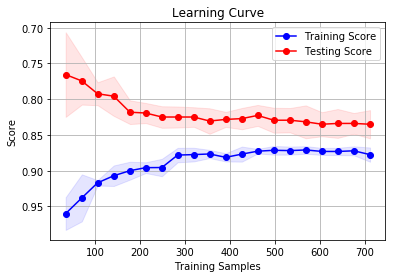

(0.85136484460898831, 0.072220795287220807)

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(vc1, 'Learning Curve', Xt, yt)

In [56]:
train_data_orig = pred_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1_train_pred = vc1.predict(Xt)
vc1_err = train_data_orig.loc[vc1_train_pred != yt]
vc1_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
55,56,1,1,"Woolner, Mr. Hugh",male,NaN,0,0,19947,35.5000,C52,S
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.0,4,2,3101281,7.9250,NaN,S


for clf, label in zip([m1, m2, m3, m4, m5, vc1], ['Bagging Random Forest','Random Forest','SVM Classifier','GBDT','KNN3','Votting Classifier']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

In [57]:
pred_data_vc2 = pred_data_ready
vc2_test = pred_data_vc2.values
vc2_pred = vc1.predict(vc2_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc2_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc2.csv',index=False,sep=',')

In [58]:
X_train, X_test, y_train, y_test = train_test_split(Xo, yo, test_size = 0.5) 

vc1 = VotingClassifier(est)
vc1.fit(X_train,y_train)
print(vc.score(X_test,y_test))
print(cross_val_score(rfc, X_test, y_test, cv=5))

0.914389799636
[ 0.83636364  0.85454545  0.79090909  0.9         0.87155963]


結果:0.77990

In [59]:
pred_data_vc3 = pred_data_ready
vc3_test = pred_data_vc3.values
vc3_pred = vc1.predict(vc3_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc3_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc3.csv',index=False,sep=',')

In [60]:
bagrfc.fit(X_train, y_train)
print(bagrfc.score(X_test,y_test))
print(cross_val_score(bagrfc,X_train, y_train, cv=5))

0.859744990893
[ 0.82727273  0.83636364  0.82727273  0.85454545  0.79816514]


In [61]:
pred_data_bagrfc1 = pred_data_ready
bagrfc1_test = pred_data_bagrfc1.values
bagrfc1_pred = bagrfc.predict(bagrfc1_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':bagrfc1_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_bagrfc1.csv',index=False,sep=',')

結果:0.77990

In [62]:
from mlxtend.classifier import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.90,max_features=0.90)
m2 = RandomForestClassifier(n_estimators=100)
m3 = SVC()
m4 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,subsample=0.8)
m5 = KNeighborsClassifier(n_neighbors=3)
lr = LogisticRegression()

sclf = StackingClassifier(classifiers=[m1, m2, m3, m4, m5], meta_classifier=lr)
print('5-fold cross validation:\n')

for clf, label in zip([m1, m2, m3, m4, m5, sclf], ['Bagging Random Forest','Random Forest','SVM Classifier','GBDT','KNN3','StackingClassifier']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

5-fold cross validation:

Accuracy: 0.88 (+/- 0.04) [Bagging Random Forest]
Accuracy: 0.89 (+/- 0.04) [Random Forest]
Accuracy: 0.81 (+/- 0.02) [SVM Classifier]
Accuracy: 0.88 (+/- 0.04) [GBDT]
Accuracy: 0.82 (+/- 0.04) [KNN3]
Accuracy: 0.90 (+/- 0.04) [StackingClassifier]


In [63]:
train_data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Deck', 'HasCabin', 'HasCabin_No', 'HasCabin_Yes', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'NameLen', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'FamilyClass', 'FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily', 'Adult', 'Adult_No', 'Adult_Yes',
       'Group_Ticket', 'FareReal', 'UseGT', 'UseGT_0', 'UseGT_1',
       'SexAdult_female', 'SexAdult_male', 'SexAdult_No', 'SexAdult_Yes',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Mother_No', 'Mother_Yes'],
      dtype='object')

In [64]:
from sklearn.preprocessing import MinMaxScaler
AFN_scale = MinMaxScaler()
pred_data2[['Age','SibSp','Parch','Fare','FareReal','NameLen','FamilySize']] = AFN_scale.fit_transform(pred_data2[['Age','SibSp','Parch','Fare','FareReal', 'NameLen','FamilySize']])
train_data2[['Age','SibSp','Parch','Fare','FareReal','NameLen','FamilySize']] = AFN_scale.fit_transform(train_data2[['Age','SibSp','Parch','Fare','FareReal', 'NameLen','FamilySize']])

In [65]:
train_data_ready2 = train_data2.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)
pred_data_ready2 = pred_data2.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)

X = train_data_ready2.drop(['Survived'],axis=1)
y = train_data_ready2['Survived']
Xt = X.values
yt = y.values

In [66]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import RandomOverSampler


ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

est = []
m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.90,max_features=0.90)
est.append(('bagrfc',m1))
m2 = RandomForestClassifier(n_estimators=100)
est.append(('rfc',m2))
m3 = SVC()
est.append(('svm',m3))
m4 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,subsample=0.8)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=3)
est.append(('knn',m5))

vc4 = VotingClassifier(est)
vc4.fit(Xo,yo)

for clf, label in zip([m1, m2, m3, m4, m5, vc4], ['Bagging Random Forest','Random Forest','SVM Classifier','GBDT','KNN3','Votting Classifier']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.88 (+/- 0.03) [Bagging Random Forest]
Accuracy: 0.90 (+/- 0.04) [Random Forest]
Accuracy: 0.82 (+/- 0.03) [SVM Classifier]
Accuracy: 0.88 (+/- 0.04) [GBDT]
Accuracy: 0.83 (+/- 0.04) [KNN3]
Accuracy: 0.88 (+/- 0.04) [Votting Classifier]


In [67]:
pred_data_vc4 = pred_data_ready2
vc4_test = pred_data_vc4.values
vc4_pred = vc4.predict(vc4_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc4_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc4.csv',index=False,sep=',')

結果:0.78468  -- 沒有使用ParCh,SibSp,有使用Mother
結果:0.78947  -- 全數使用            

In [68]:
train_data_orig = pred_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc4_train_pred = vc4.predict(Xt)
vc4_err = train_data_orig.loc[vc4_train_pred != yt]

In [69]:
train_data_orig = pred_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1_train_pred = vc1.predict(train_data1.values)
vc2_err = train_data_orig.loc[vc1_train_pred != train_data1_target.values]

In [70]:
clf = LogisticRegression()


clf.fit(Xt,yt)
for clf, label in zip([clf], ['LogisticRegression']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.82 (+/- 0.04) [LogisticRegression]


In [71]:
train_data_ready2.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'HasCabin_No', 'HasCabin_Yes', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'NameLen', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily', 'Adult_No', 'Adult_Yes', 'FareReal',
       'UseGT_0', 'UseGT_1', 'SexAdult_female', 'SexAdult_male', 'SexAdult_No',
       'SexAdult_Yes', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Mother_No',
       'Mother_Yes'],
      dtype='object')

In [72]:
pd.DataFrame({"columns":list(train_data_ready2.columns)[1:], "coef":list(clf.coef_.T)}).sort_values(['coef'])

,coef,columns
0,[-1.85353663247],Age
19,[-1.22683955895],FamilyClass_MediumFamily
9,[-0.979442581674],Title_Mr
33,[-0.765781612573],Pclass_3
11,[-0.702875566907],Title_Officer
1,[-0.678524339045],SibSp
17,[-0.64319146114],FamilySize
28,[-0.395267538159],SexAdult_male
4,[-0.395267538159],Sex_male
18,[-0.394362712789],FamilyClass_LargeFamily


In [73]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(n_estimators=50)
gbc.fit(Xt,yt)
gbc.score(Xt,yt)

0.88552188552188549

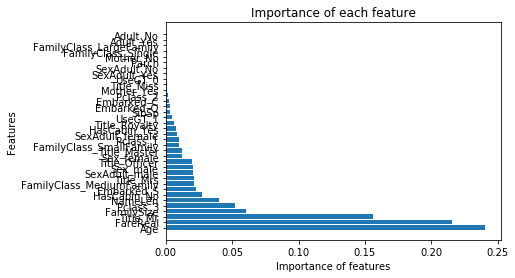

In [74]:
imp = gbc.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [77]:
train_data2[['FamilyClass','Sex','Pclass','Embarked','Survived','PassengerId']].groupby(['FamilyClass','Sex','Pclass','Embarked','Survived']).count()

PassengerId
FamilyClass  Sex    Pclass Embarked Survived             
LargeFamily  female 3      S        0                  10
                                    1                   3
             male   3      S        0                  11
                                    1                   1
MediumFamily female 1      C        1                   2
                           S        1                   2
                    2      S        1                   2
                    3      Q        0                   1
                           S        0                  13
             male   1      S        0                   2
                    3      Q        0                   4
                           S        0                  11
Single       female 1      C        0                   1
                                    1                  19
                           S        1                  14
                    2      C        1                   2
                           Q        1                   2
                           S        0                   3
                                    1                  25
                    3      C        0                   1
                                    1                   4
                           Q        0                   6
                                    1                  19
                           S        0                  16
                                    1                  14
             male   1      C        0                  15
                                    1                   8
                           S        0                  35
                                    1                  17
                    2      C        0                   3
...                                                   ...
                    3      S        0                 177
                                    1                  25
SmallFamily  female 1      C        1                  23
                           Q        1                   1
                           S        0                   2
                                    1                  30
                    2      C        1                   5
                           S        0                   3
                                    1                  34
                    3      C        0                   7
                                    1                  11
                           Q        0                   2
                                    1                   5
                           S        0                  16
                                    1                  16
             male   1      C        0                  10
                                    1                   9
                           Q        0                   1
                           S        0                  14
                                    1                  11
                    2      C        0                   5
                                    1                   1
                           S        0                  21
                                    1                   9
                    3      C        0                   5
                                    1                   5
                           Q        0                   5
                                    1                   1
                           S        0                  32
                                    1                   8

[68 rows x 1 columns]

In [85]:
train_data2.loc[train_data2['Pclass']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,UseGT_1,SexAdult_female,SexAdult_male,SexAdult_No,SexAdult_Yes,Pclass_1,Pclass_2,Pclass_3,Mother_No,Mother_Yes
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,0.125,0.0,PC 17599,0.139136,...,0,1,0,0,1,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,0.125,0.0,113803,0.103644,...,1,1,0,0,1,1,0,0,1,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0.673285,0.000,0.0,17463,0.101229,...,0,0,1,0,1,1,0,0,1,0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,0.723549,0.000,0.0,113783,0.051822,...,0,1,0,0,1,1,0,0,1,0
23,24,1,1,"Sloper, Mr. William Thompson",male,0.346569,0.000,0.0,113788,0.069291,...,0,0,1,0,1,1,0,0,1,0


In [86]:
train_data3 = train_data2.copy()
pred_data3 = pred_data2.copy()

In [87]:
train_data2.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Deck', 'HasCabin', 'HasCabin_No', 'HasCabin_Yes', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'NameLen', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'FamilyClass', 'FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily', 'Adult', 'Adult_No', 'Adult_Yes',
       'Group_Ticket', 'FareReal', 'UseGT', 'UseGT_0', 'UseGT_1',
       'SexAdult_female', 'SexAdult_male', 'SexAdult_No', 'SexAdult_Yes',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Mother_No', 'Mother_Yes'],
      dtype='object')

In [88]:
train_data_ready3 = train_data3.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily'],axis=1)
pred_data_ready3 = pred_data3.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily',],axis=1)

X = train_data_ready3.drop(['Survived'],axis=1)
y = train_data_ready3['Survived']
Xt = X.values
yt = y.values

In [89]:
train_data_ready3.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'HasCabin_No', 'HasCabin_Yes', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'NameLen', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'Adult_No', 'Adult_Yes',
       'FareReal', 'UseGT_0', 'UseGT_1', 'SexAdult_female', 'SexAdult_male',
       'SexAdult_No', 'SexAdult_Yes', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Mother_No', 'Mother_Yes'],
      dtype='object')

In [90]:
clf = LogisticRegression()


clf.fit(Xt,yt)
for clf, label in zip([clf], ['LogisticRegression']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))


Accuracy: 0.82 (+/- 0.04) [LogisticRegression]


In [91]:
pd.DataFrame({"columns":list(train_data_ready3.columns)[1:], "coef":list(clf.coef_.T)}).sort_values(['coef'])

,coef,columns
0,[-1.86043329037],Age
17,[-1.63394621406],FamilySize
1,[-1.49988219338],SibSp
9,[-0.930930969841],Title_Mr
29,[-0.734063841729],Pclass_3
2,[-0.723400765593],Parch
11,[-0.653795456243],Title_Officer
4,[-0.324105083953],Sex_male
24,[-0.324105083953],SexAdult_male
5,[-0.281158079733],HasCabin_No


In [92]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

X = train_data_ready3.drop(['Survived'],axis=1)
y = train_data_ready3['Survived']
Xt = X.values
yt = y.values

est = []
m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.90,max_features=0.90)
est.append(('bagrfc',m1))
m2 = RandomForestClassifier(n_estimators=100)
est.append(('rfc',m2))
m3 = SVC()
est.append(('svm',m3))
m4 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.8,subsample=0.8)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=3)
est.append(('knn',m5))

vc1 = VotingClassifier(est)
vc1.fit(Xt,yt)

for clf, label in zip([m1, m2, m3, m4, m5, vc1], ['Bagging Random Forest','Random Forest','SVM Classifier','GBDT','KNN3','Votting Classifier']):
    scores = cross_val_score(clf, Xt, yt, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.83 (+/- 0.01) [Bagging Random Forest]
Accuracy: 0.83 (+/- 0.01) [Random Forest]
Accuracy: 0.80 (+/- 0.03) [SVM Classifier]
Accuracy: 0.82 (+/- 0.01) [GBDT]
Accuracy: 0.80 (+/- 0.01) [KNN3]
Accuracy: 0.84 (+/- 0.01) [Votting Classifier]


In [93]:
train_data_orig = pred_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1_train_pred = vc1.predict(Xt)
vc1_err = train_data_orig.loc[vc1_train_pred != yt]

In [95]:
vc1_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      female 0     0             1
              1     2             2
       male   1     0             1
              2     0             1
2      female 0     0             1
              1     1             1
       male   0     0             6
              1     0             1
3      female 0     0             1
              1     0             1
              4     2             1
       male   0     0            18
              1     0             2
                    1             1
              2     0             1
              4     2             1

In [96]:
vc1_err.loc[(vc1_err['Pclass']==3) & (vc1_err['Sex']=='male') & (vc1_err['SibSp']==0) & (vc1_err['Parch']==0)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
220,221,1,3,"Sunderland, Mr. Victor Francis",male,16.0,0,0,SOTON/OQ 392089,8.0500,NaN,S
271,272,1,3,"Tornquist, Mr. William Henry",male,25.0,0,0,LINE,0.0000,NaN,S
286,287,1,3,"de Mulder, Mr. Theodore",male,30.0,0,0,345774,9.5000,NaN,S
338,339,1,3,"Dahl, Mr. Karl Edwart",male,45.0,0,0,7598,8.0500,NaN,S
391,392,1,3,"Jansson, Mr. Carl Olof",male,21.0,0,0,350034,7.7958,NaN,S
400,401,1,3,"Niskanen, Mr. Juha",male,39.0,0,0,STON/O 2. 3101289,7.9250,NaN,S
414,415,1,3,"Sundman, Mr. Johan Julian",male,44.0,0,0,STON/O 2. 3101269,7.9250,NaN,S
429,430,1,3,"Pickard, Mr. Berk (Berk Trembisky)",male,32.0,0,0,SOTON/O.Q. 392078,8.0500,E10,S


In [97]:
ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)
clf = LogisticRegression()


clf.fit(Xo,yo)
for clf, label in zip([clf], ['LogisticRegression']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

pd.DataFrame({"columns":list(train_data_ready3.columns)[1:], "coef":list(clf.coef_.T)}).sort_values(['coef'])

Accuracy: 0.81 (+/- 0.02) [LogisticRegression]


,coef,columns
0,[-2.2573628665],Age
17,[-1.90947808777],FamilySize
1,[-1.63903971448],SibSp
2,[-0.997077193646],Parch
9,[-0.731014410824],Title_Mr
11,[-0.722721672729],Title_Officer
29,[-0.549940380206],Pclass_3
5,[-0.347122304381],HasCabin_No
4,[-0.27236868668],Sex_male
24,[-0.27236868668],SexAdult_male


In [98]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

X = train_data_ready3.drop(['Survived'],axis=1)
y = train_data_ready3['Survived']
Xt = X.values
yt = y.values

ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

est = []
m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.90,max_features=0.90)
est.append(('bagrfc',m1))
m2 = RandomForestClassifier(n_estimators=100)
est.append(('rfc',m2))
#m3 = SVC()
#est.append(('svm',m3))
m3 = LogisticRegression(C=0.1)
est.append(('lr',m3))
m4 = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=0.8)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=3)
est.append(('knn',m5))

vc1 = VotingClassifier(est)
vc1.fit(Xo,yo)

for clf, label in zip([m1, m2, m3, m4, m5, vc1], ['Bagging Random Forest','Random Forest','Logistic Regression','GBDT','KNN3','Votting Classifier']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

Accuracy: 0.86 (+/- 0.04) [Bagging Random Forest]
Accuracy: 0.89 (+/- 0.03) [Random Forest]
Accuracy: 0.79 (+/- 0.02) [Logistic Regression]
Accuracy: 0.85 (+/- 0.03) [GBDT]
Accuracy: 0.82 (+/- 0.02) [KNN3]
Accuracy: 0.87 (+/- 0.03) [Votting Classifier]


In [99]:
train_data_orig = pred_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1_train_pred = vc1.predict(Xt)
vc1_err = train_data_orig.loc[vc1_train_pred != yt]

In [100]:
vc1_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      female 0     0             1
              1     2             2
       male   0     0             5
                    1             1
              1     0             3
2      female 0     0             3
              1     0             2
                    1             1
       male   0     0             4
              1     0             1
3      female 0     0            10
                    1             1
              1     0             4
                    1             2
       male   0     0            14
              1     0             1
                    1             1
              2     0             1

In [101]:
vc1_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S
139,140,0,1,"Giglio, Mr. Victor",male,24.0,0,0,PC 17593,79.2000,B86,C
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
199,200,0,2,"Yrois, Miss. Henriette (""Mrs Harbeck"")",female,24.0,0,0,248747,13.0000,NaN,S


In [102]:
train_data_ready4 = train_data3.drop(['PassengerId','Pclass','Fare','SibSp','Parch','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily'],axis=1)
pred_data_ready4 = pred_data3.drop(['PassengerId','Pclass','Fare','SibSp','Parch','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily',],axis=1)

X = train_data_ready4.drop(['Survived'],axis=1)
y = train_data_ready4['Survived']
Xt = X.values
yt = y.values

In [103]:
clf = LogisticRegression()


clf.fit(Xt,yt)
for clf, label in zip([clf], ['LogisticRegression']):
    scores = cross_val_score(clf, Xo, yo, cv=5, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

pd.DataFrame({"columns":list(train_data_ready4.columns)[1:], "coef":list(clf.coef_.T)}).sort_values(['coef'])

Accuracy: 0.81 (+/- 0.03) [LogisticRegression]


,coef,columns
15,[-2.56134905912],FamilySize
0,[-1.8544102846],Age
7,[-0.910291496529],Title_Mr
27,[-0.752444330193],Pclass_3
9,[-0.650683996942],Title_Officer
2,[-0.338219305222],Sex_male
22,[-0.338219305222],SexAdult_male
3,[-0.297108017082],HasCabin_No
14,[-0.220460123922],Embarked_S
6,[-0.0852700822783],Title_Miss


In [104]:
def fare_category(fare):
    if fare <= 5:
        return 0
    else:
        return 1
#    elif fare <= 30:
#        return 2
#    elif fare <= 45:
#        return 3
#    else:
#        return 4
    
train_data_orig = pd.read_csv('/Volumes/DATA/Tempfiles/train.csv')
pred_data_orig = pd.read_csv('/Volumes/DATA/Tempfiles/test.csv')


train_data3['Fare_Category'] = train_data_orig['Fare'].apply(fare_category)
pred_data3['Fare_Category'] = pred_data_orig['Fare'].apply(fare_category)

train_data3_FareCat_ohe = pd.get_dummies(train_data3['Fare_Category'],prefix='FareCat')
pred_data3_FareCat_ohe = pd.get_dummies(pred_data3['Fare_Category'],prefix='FareCat')
train_data3 = pd.concat([train_data3,train_data3_FareCat_ohe],axis=1)
pred_data3 = pd.concat([pred_data3,pred_data3_FareCat_ohe],axis=1)

In [105]:
train_data['Cabin'].str.get(0)
train_data3['TicketL'] = train_data_orig['Ticket'].str.get(0)
pred_data3['TicketL'] = pred_data_orig['Ticket'].str.get(0)

train_data3['TicketL'] = np.where(train_data3['TicketL'].str.isnumeric(),0,1)
pred_data3['TicketL'] = np.where(pred_data3['TicketL'].str.isnumeric(),0,1)

train_data3_TL_ohe = pd.get_dummies(train_data3['TicketL'],prefix='TicketL')
pred_data3_TL_ohe = pd.get_dummies(pred_data3['TicketL'],prefix='TicketL')
train_data3 = pd.concat([train_data3,train_data3_TL_ohe],axis=1)
pred_data3 = pd.concat([pred_data3,pred_data3_TL_ohe],axis=1)

In [108]:
train_data3_Pc_ohe = pd.get_dummies(train_data3['Pclass'],prefix='Pclass')
pred_data3_Pc_ohe = pd.get_dummies(pred_data3['Pclass'],prefix='Pclass')
train_data3 = pd.concat([train_data3,train_data3_Pc_ohe],axis=1)
pred_data3 = pd.concat([pred_data3,pred_data3_Pc_ohe],axis=1)

In [109]:
train_data3.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_female',
       'Sex_male', 'Deck', 'HasCabin', 'HasCabin_No', 'HasCabin_Yes', 'Title',
       'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Mrs', 'Title_Officer',
       'Title_Royalty', 'NameLen', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'FamilySize', 'FamilyClass', 'FamilyClass_LargeFamily',
       'FamilyClass_MediumFamily', 'FamilyClass_Single',
       'FamilyClass_SmallFamily', 'Adult', 'Adult_No', 'Adult_Yes',
       'Group_Ticket', 'FareReal', 'UseGT', 'UseGT_0', 'UseGT_1',
       'SexAdult_female', 'SexAdult_male', 'SexAdult_No', 'SexAdult_Yes',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Mother_No', 'Mother_Yes',
       'Fare_Category', 'FareCat_0', 'FareCat_1', 'TicketL', 'TicketL_0',
       'TicketL_1', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [147]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

#解決OverFitting 
train_data_ready3 = train_data3.drop(['Age','Pclass','FamilySize','TicketL','Fare','SibSp','Parch',
       'PassengerId','Pclass','Name','Sex','Ticket','Cabin','FareCat_0','FareCat_1','NameLen',
       'Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)
pred_data_ready3 = pred_data3.drop(['Age','Pclass','FamilySize','TicketL','Fare','SibSp','Parch',
       'PassengerId','Pclass','Name','Sex','Ticket','Cabin','FareCat_0','FareCat_1','NameLen',
       'Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT'],axis=1)

In [148]:
train_data_ready3

,Survived,Sex_female,Sex_male,HasCabin_No,HasCabin_Yes,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,...,Pclass_2,Pclass_3,Mother_No,Mother_Yes,Fare_Category,TicketL_0,TicketL_1,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,1,0,0,0,1,0,0,...,0,1,1,0,1,0,1,0,0,1
1,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,0,1,1,0,0
2,1,1,0,1,0,0,1,0,0,0,...,0,1,1,0,1,0,1,0,0,1
3,1,1,0,0,1,0,0,0,1,0,...,0,0,1,0,1,1,0,1,0,0
4,0,0,1,1,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,1
5,0,0,1,1,0,0,0,1,0,0,...,0,1,1,0,1,1,0,0,0,1
6,0,0,1,0,1,0,0,1,0,0,...,0,0,1,0,1,1,0,1,0,0
7,0,0,1,1,0,1,0,0,0,0,...,0,1,1,0,1,1,0,0,0,1
8,1,1,0,1,0,0,0,0,1,0,...,0,1,0,1,1,1,0,0,0,1
9,1,1,0,1,0,0,0,0,1,0,...,1,0,1,0,1,1,0,0,1,0


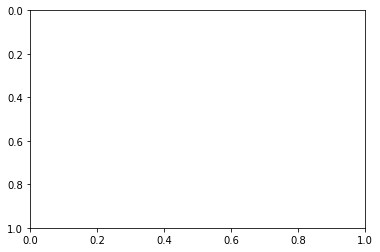

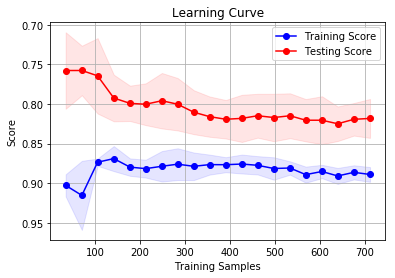

(0.84600960377346013, 0.1047034036348512)

In [149]:
X = train_data_ready3.drop(['Survived'],axis=1)
y = train_data_ready3['Survived']
Xt = X.values
yt = y.values

est = []
#m1 = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=50,max_depth=8,min_samples_split=50),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.60,max_features=0.60)
#est.append(('bagc',m1))
m2 = RandomForestClassifier(n_estimators=100,max_depth=10,warm_start=True,min_samples_split=5)
est.append(('rfc',m2))
#m3 = SVC(C=0.1)
#est.append(('svm',m3))
m4 = GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,subsample=0.7,warm_start=True)
est.append(('gbdt',m4))
m5 = KNeighborsClassifier(n_neighbors=2)
est.append(('knn',m5))
#m6 = BaggingClassifier(base_estimator=KNeighborsClassifier(n_neighbors=2),n_estimators=100,bootstrap=True,bootstrap_features=True,max_samples=0.60,max_features=0.60)
#est.append(('bag_knn',m6))

vc1 = VotingClassifier(est)
vc1.fit(Xt,yt)

#for clf, label in zip([m1, m2, m3, m4, m5, vc1], ['Bagging Random Forest','Random Forest','SVM','GBDT','KNN3','Votting Classifier']):
#    scores = cross_val_score(clf, Xt, yt, cv=5, scoring='accuracy')
#    print("Accuracy: %0.2f (+/- %0.2f) [%s]"  % (scores.mean(), scores.std(), label))

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(vc, 'Learning Curve', X, y)

In [150]:
train_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1_train_pred = vc1.predict(Xt)
vc1_err = train_data_orig.loc[vc1_train_pred != yt]
vc1_err[['Pclass','Sex','SibSp','Parch','Embarked','Survived']].groupby(['Pclass','Sex','SibSp','Parch','Embarked']).count()

Survived
Pclass Sex    SibSp Parch Embarked          
1      female 0     0     C                1
              1     2     S                2
       male   0     0     C                3
                          S                9
                    1     C                2
                    2     C                1
              1     0     C                1
                          S                4
                    2     S                1
              2     0     S                1
2      female 0     0     S                2
              1     0     S                2
                    1     S                1
       male   0     0     C                1
                          S                6
              1     0     S                1
3      female 0     0     Q                3
                          S                8
              1     0     C                1
                          S                1
                    1     C                1
                          S                2
                    5     S                1
              4     2     S                2
       male   0     0     C                5
                          Q                2
                          S               25
              1     0     S                2
                    1     C                1
              2     0     Q                1
              4     2     S                1

In [146]:
vc1_err[['Embarked','Sex','Survived']].groupby(['Embarked','Sex']).count()

Survived
Embarked Sex             
C        female         3
         male          12
Q        female         4
         male           3
S        female        15
         male          50

In [113]:
vc1_err.loc[(vc1_err['Sex']=='male') & (vc1_err['Pclass']==3)].agg({'Fare':np.mean})

Fare    10.894067
dtype: float64

In [114]:
pred_data_vc1 = pred_data_ready3
vc1_test = pred_data_vc1.values
vc1_pred = vc1.predict(vc1_test)
PassengerId = pred_data['PassengerId'].values
test_submit = pd.DataFrame({'PassengerId':PassengerId,'Survived':vc1_pred.astype(int)})
test_submit.to_csv('Titanic_submit_new_vc1.csv',index=False,sep=',')

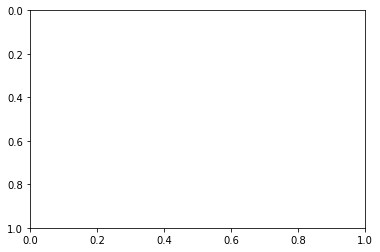

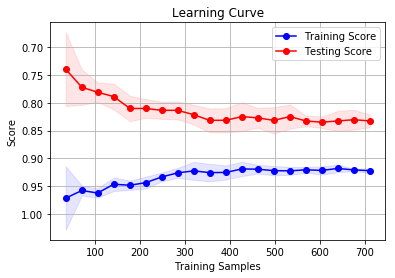

(0.87381770701779282, 0.10480992309610404)

In [115]:
ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)

vc1o = VotingClassifier(est)
vc1o.fit(Xo,yo)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(vc1o, 'Learning Curve', X, y)

In [131]:
train_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
vc1o_train_pred = vc1o.predict(Xt)
vc1o_err = train_data_orig.loc[vc1o_train_pred != yt]
vc1o_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      female 0     0             1
              1     2             2
       male   0     0             7
              1     0             2
2      female 0     0             2
              1     0             2
                    1             1
       male   0     0             6
              1     0             1
3      female 0     0             8
              1     0             4
                    1             1
              4     2             1
       male   0     0            26
              1     0             2
                    1             1
              2     0             1
              4     2             1

In [132]:
vc1o_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
111,112,0,3,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C
127,128,1,3,"Madsen, Mr. Fridtjof Arne",male,24.0,0,0,C 17369,7.1417,NaN,S


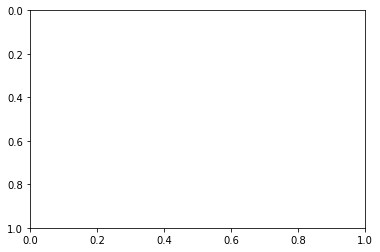

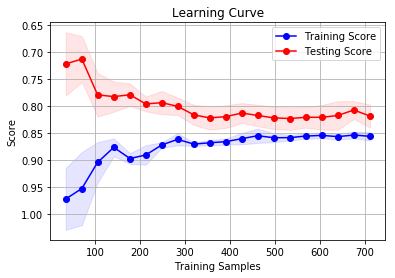

(0.83018693623315398, 0.066185882249406247)

In [151]:
gbc = GradientBoostingClassifier(n_estimators=50,learning_rate=0.01,subsample=0.8,max_depth=5)
gbc.fit(Xt,yt)
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(gbc, 'Learning Curve', X, y)

In [152]:
train_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
gbc_train_pred = gbc.predict(Xt)
gbc_err = train_data_orig.loc[gbc_train_pred != yt]
gbc_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      female 0     0             1
              1     2             2
       male   0     0            20
                    1             2
                    2             1
              1     0             8
                    1             1
                    2             1
              2     0             1
2      female 0     0             2
              1     0             2
                    1             1
       male   0     0             7
              1     0             1
3      female 0     0            19
                    1             3
                    2             5
                    3             1
              1     0             6
                    1             5
                    5             1
              3     0             1
              4     2             2
       male   0     0            32
              1     0             2
                    1             1
              2     0             1
              4     2             1

In [153]:
gbc_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S


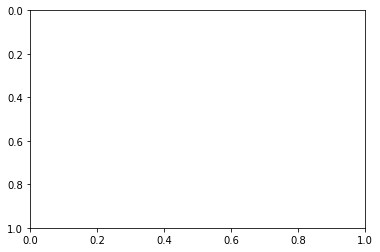

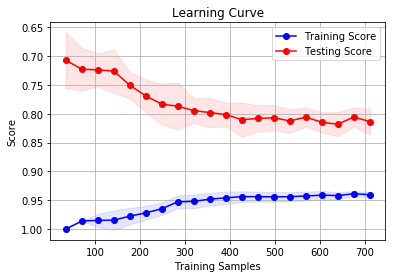

(0.86831061154251332, 0.15410510033325209)

In [154]:
ros = RandomOverSampler()
Xo,yo = ros.fit_sample(Xt,yt)
gbco = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,subsample=0.8,max_depth=10)
gbco.fit(Xo,yo)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(gbco, 'Learning Curve', X, y)

In [155]:
train_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
gbco_train_pred = gbco.predict(Xt)
gbco_err = train_data_orig.loc[gbco_train_pred != yt]
gbco_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      male   0     0             9
              1     0             1
                    1             1
2      female 0     0             2
              1     0             2
       male   0     0             5
              1     0             1
3      female 0     0             8
       male   0     0            26
              1     0             1
              4     2             1

In [156]:
gbco_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1,0,11668,21.0000,NaN,S
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.0,0,0,345779,9.5000,NaN,S
107,108,1,3,"Moss, Mr. Albert Johan",male,NaN,0,0,312991,7.7750,NaN,S
115,116,0,3,"Pekoniemi, Mr. Edvard",male,21.0,0,0,STON/O 2. 3101294,7.9250,NaN,S
129,130,0,3,"Ekstrom, Mr. Johan",male,45.0,0,0,347061,6.9750,NaN,S
146,147,1,3,"Andersson, Mr. August Edvard (""Wennerstrom"")",male,27.0,0,0,350043,7.7958,NaN,S
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
173,174,0,3,"Sivola, Mr. Antti Wilhelm",male,21.0,0,0,STON/O 2. 3101280,7.9250,NaN,S


結果:0.77033

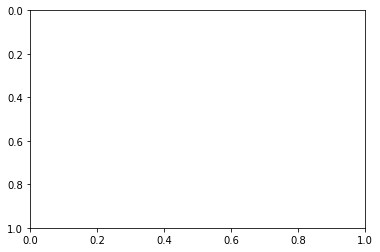

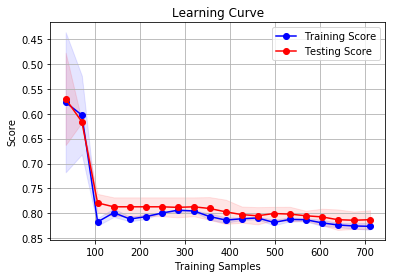

(0.81319851610681304, 0.038934381046476618)

In [158]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

train_data_ready3 = train_data3.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       ],axis=1)
pred_data_ready3 = pred_data3.drop(['PassengerId','Pclass','Fare','Name','Sex','Ticket','Cabin','Embarked','Deck','HasCabin','Title','FamilyClass','Adult','Group_Ticket','UseGT','FamilyClass_LargeFamily',
       ],axis=1)

X = train_data_ready3.drop(['Survived'],axis=1)
y = train_data_ready3['Survived']
Xt = X.values
yt = y.values

rfc = RandomForestClassifier(n_estimators=100,min_samples_split=50,min_samples_leaf=10,max_depth=8,warm_start=True)
rfc.fit(Xt,yt)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5, n_jobs=1, 
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel('Training Samples')
        plt.ylabel('Score')
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label='Training Score')
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label='Testing Score')

        plt.legend(loc="best")

        plt.draw()
        plt.show()
        plt.gca().invert_yaxis()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

plot_learning_curve(rfc, 'Learning Curve', X, y)

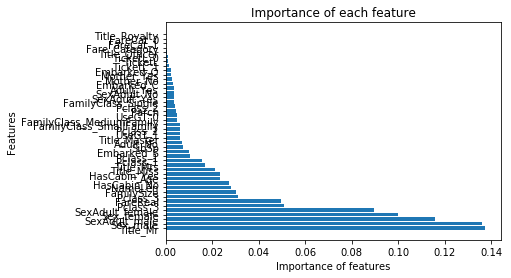

In [159]:
imp = rfc.feature_importances_
names = X.columns

imp, names = zip(*sorted(zip(imp, names)))

plt.barh(range(len(names)), imp, align='center')
plt.yticks(range(len(names)), names)

plt.xlabel('Importance of features')
plt.ylabel('Features')
plt.title('Importance of each feature')
plt.show()

In [160]:
train_data_orig = pd.read_csv(r'C:\pyml_scripts\train.csv')
rfc_train_pred = rfc.predict(Xt)
rfc_err = train_data_orig.loc[rfc_train_pred != yt]
rfc_err[['Pclass','Sex','SibSp','Parch','Survived']].groupby(['Pclass','Sex','SibSp','Parch']).count()

Survived
Pclass Sex    SibSp Parch          
1      female 0     0             1
              1     2             2
       male   0     0            25
                    1             2
                    2             1
              1     0             9
                    1             2
                    2             1
              2     0             1
2      female 0     0             3
              1     0             2
                    1             1
       male   0     0             7
              1     0             1
3      female 0     0            22
                    1             3
                    2             3
              1     0            11
                    1             5
                    2             1
                    5             1
              2     0             1
              4     2             2
       male   0     0            32
                    1             2
                    2             1
              1     0             3
                    1             5
                    2             1
              2     0             1
              4     2             1

In [161]:
rfc_err

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.00,0,0,350406,7.8542,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.00,1,0,345763,18.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.00,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.00,0,0,113788,35.5000,A6,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.00,1,5,347077,31.3875,NaN,S
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
38,39,0,3,"Vander Planke, Miss. Augusta Maria",female,18.00,2,0,345764,18.0000,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.00,1,0,7546,9.4750,NaN,S
41,42,0,2,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.00,1,0,11668,21.0000,NaN,S


In [162]:
train_data_orig.groupby(['Pclass']).agg({'Fare':np.mean,'Pclass':np.size})

,Fare,Pclass
Pclass,,
1,84.154687,216
2,20.662183,184
3,13.675550,491


In [168]:
train_data_ready3.to_csv('train_data_ready3.csv',index=False,sep=',')
pred_data_ready3.to_csv('pred_data_ready3.csv',index=False,sep=',')

In [169]:
train_data_ready3.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'HasCabin_No', 'HasCabin_Yes', 'Title_Master', 'Title_Miss', 'Title_Mr',
       'Title_Mrs', 'Title_Officer', 'Title_Royalty', 'NameLen', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'FamilySize', 'FamilyClass_MediumFamily',
       'FamilyClass_Single', 'FamilyClass_SmallFamily', 'Adult_No',
       'Adult_Yes', 'FareReal', 'UseGT_0', 'UseGT_1', 'SexAdult_female',
       'SexAdult_male', 'SexAdult_No', 'SexAdult_Yes', 'Pclass_1', 'Pclass_2',
       'Pclass_3', 'Mother_No', 'Mother_Yes', 'Fare_Category', 'FareCat_0',
       'FareCat_1', 'TicketL', 'TicketL_0', 'TicketL_1', 'Pclass_1',
       'Pclass_2', 'Pclass_3'],
      dtype='object')